In [16]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

data = pd.read_excel('prediction_data.xlsx', sheet_name='vw_ChurnData')
print(data.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   
2   11167-WES  Female   43     Yes     West Bengal                    3   
3   11179-MAH    Male   35      No     Maharashtra                   10   
4   11180-TAM    Male   75     Yes      Tamil Nadu                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                31     Deal 1           Yes             No  ...   
1                 9     Deal 5           Yes             No  ...   
2                28     Deal 1           Yes            Yes  ...   
3                12        NaN           Yes             No  ...   
4                27     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      95.099998   6683.399902          0.00   
1  Bank Wi

In [17]:
# drop unwanted columns

data = data.drop(['Customer_ID','Churn_Category','Churn_Reason'],axis=1)

#Replacing column values with numbers
columns_to_encode = ['Gender','Married','State','Value_Deal','Phone_Service','Multiple_Lines','Internet_Service',
                     'Internet_Type','Online_Security','Online_Backup','Device_Protection_Plan','Premium_Support',
                     'Streaming_TV','Streaming_Movies','Streaming_Music','Unlimited_Data','Contract','Paperless_Billing','Payment_Method']

#encodeing
label_encoder = {}
for column in columns_to_encode:
    label_encoder[column] = LabelEncoder()
    data[column] = label_encoder[column].fit_transform(data[column])

#encoding churned customer stayed:0 and churned:1
data['Customer_Status'] = data['Customer_Status'].map({'Stayed':0,'Churned':1})

#spliting train annd test data
x = data.drop("Customer_Status",axis=1)
y = data['Customer_Status']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)







In [18]:
#random forest

rf = RandomForestClassifier(n_estimators = 100, random_state=42)

rf.fit(x_train,y_train) 

RandomForestClassifier(random_state=42)

Confusion matrix
[[783  64]
 [126 229]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       847
           1       0.78      0.65      0.71       355

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



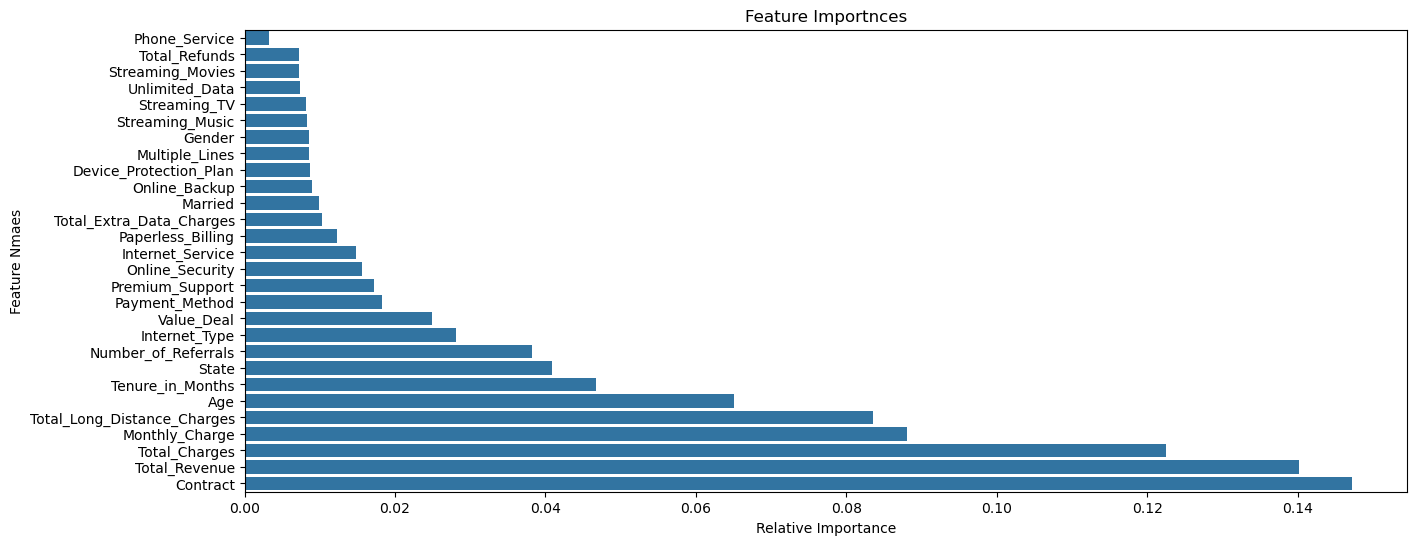

In [19]:
#model evaluation
y_pred = rf.predict(x_test)

print("Confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("\nClassification Report:")
print(classification_report(y_test,y_pred))

#feature selection
importances = rf.feature_importances_
indices = np.argsort(importances)[::1]

#plot the feature importances
plt.figure(figsize=(15,6))
sns.barplot(x=importances[indices],y=x.columns[indices])
plt.title("Feature Importnces")
plt.xlabel("Relative Importance")
plt.ylabel("Feature Nmaes")
plt.show()

In [20]:
#for predicting from new data
new_data = pd.read_excel('prediction_data.xlsx', sheet_name='vw_JoinData')
print(new_data.head())

original_data = new_data.copy()
customer_ids = new_data['Customer_ID']
new_data = new_data.drop(['Customer_ID','Customer_Status','Churn_Category','Churn_Reason'],axis=1)

#encodeing column values by numbers
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoder[column].transform(new_data[column])

#make new prediction
new_prediction = rf.predict(new_data)

#add prediction to original dataframe
original_data['Customer_Status_Predicted'] = new_prediction

#filtering dataframe to include only records predicted as churmed
original_data = original_data[original_data['Customer_Status_Predicted']==1]

original_data.to_csv("model_prediction.csv")

  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   11751-TAM  Female   18      No   Tamil Nadu                    5   
1   12056-WES    Male   27      No  West Bengal                    2   
2   12136-RAJ  Female   25     Yes    Rajasthan                    2   
3   12257-ASS  Female   39      No        Assam                    9   
4   12340-DEL  Female   51     Yes        Delhi                    0   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7     Deal 5            No             No  ...   
1                20        NaN           Yes             No  ...   
2                35        NaN           Yes             No  ...   
3                 1        NaN           Yes             No  ...   
4                10        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      24.299999     38.450001           0.0   
1  Bank Withdrawal      90.4